    GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted
Confusion Matrix:
[[0 0 0 1 0 0 1 3 0 0 0]
 [0 0 0 2 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 1 2 0 0 0]
 [0 0 0 1 0 0 2 2 0 0 0]
 [0 0 0 3 0 0 2 2 0 0 0]
 [0 0 0 1 0 0 2 2 0 0 0]
 [0 0 0 1 0 0 3 1 0 0 0]
 [0 0 0 2 0 0 5 1 0 0 0]
 [0 0 0 1 0 0 4 1 0 0 0]
 [0 0 0 1 0 0 2 3 0 0 0]
 [0 0 0 1 0 0 3 4 0 0 0]]
Accuracy: 7.94%


C:\Users\DELL\AppData\Local\Temp\ipykernel_1000\3487878257.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


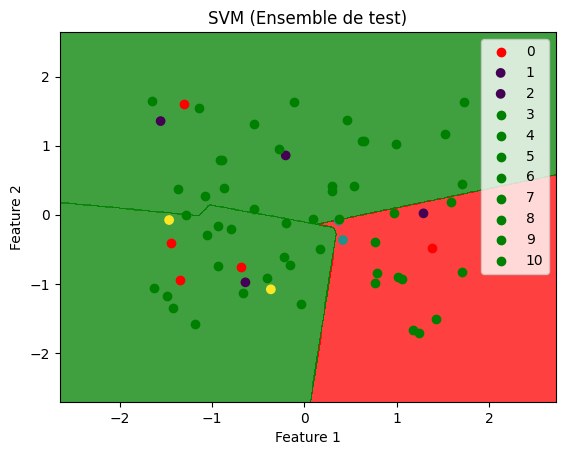

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Chargement des données
data = pd.read_csv('student_admission_dataset.csv')

# Affichage des premières lignes des données
print(data.head())

# Séparation des données en variables explicatives et variable cible
X = data.iloc[:, [0, 1]].values  # Sélection des colonnes 'Feature1' et 'Feature2' comme features
y = data.iloc[:, 2].values  # Sélection de la colonne 'Target' comme target

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Mise à l'échelle des features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création et entraînement du modèle SVM
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = classifier.predict(X_test)

# Évaluation du modèle
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualisation des résultats
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Ensemble de test)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.legend()
plt.show()
